<a href="https://colab.research.google.com/github/oliveralbrecht94/Assignment-No-2/blob/master/Assignment_2_Aufgabe_F_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function

import numpy as np

from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical



In [0]:
np.random.seed(1000)





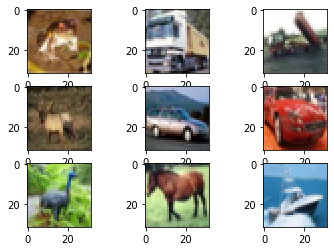

In [50]:
#Ein paar Bilder des Datensets anzeigen lassen
from matplotlib import pyplot
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

for i in range(9):

	pyplot.subplot(330 + 1 + i)
	
	pyplot.imshow(X_train[i])

pyplot.show()

In [51]:
#Model erstellen
#Ich benutze MaxPooling2D auch wenn ich weiß, dass es für Regularization sorgt.
#Ansonsten wäre die Rechenzeit trotz Colab zu lange und anderweitige Änderungen 
#am Model beeinflussen die Accuracy zu sehr.

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())

model.add(Dense(64, activation='relu'))



model.add(Dense(10, activation='softmax'))

model.summary()

  
   

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 128)        

In [0]:
 model.compile(loss='categorical_crossentropy',

                  optimizer=Adam(lr=0.0001, decay=1e-6),

                  metrics=['accuracy'])

In [53]:
 history = model.fit(X_train / 255.0, to_categorical(Y_train),

              batch_size=32,

              shuffle=True,

              epochs=30,

              validation_data=(X_test / 255.0, to_categorical(Y_test)),

              callbacks=[EarlyStopping(min_delta=0.001, patience=3)])



Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 176s 4ms/step - loss: 1.7345 - acc: 0.3656 - val_loss: 1.4654 - val_acc: 0.4692
Epoch 2/30
50000/50000 [==============================] - 172s 3ms/step - loss: 1.3832 - acc: 0.5025 - val_loss: 1.2921 - val_acc: 0.5427
Epoch 3/30
50000/50000 [==============================] - 170s 3ms/step - loss: 1.2449 - acc: 0.5605 - val_loss: 1.2095 - val_acc: 0.5735
Epoch 4/30
50000/50000 [==============================] - 167s 3ms/step - loss: 1.1440 - acc: 0.6004 - val_loss: 1.1408 - val_acc: 0.6009
Epoch 5/30
50000/50000 [==============================] - 152s 3ms/step - loss: 1.0662 - acc: 0.6304 - val_loss: 1.0932 - val_acc: 0.6213
Epoch 6/30
50000/50000 [==============================] - 153s 3ms/step - loss: 1.0054 - acc: 0.6521 - val_loss: 1.0184 - val_acc: 0.6495
Epoch 7/30
50000/50000 [==============================] - 153s 3ms/step - loss: 0.9507 - acc: 0.6698 - val_loss: 1.0053 - 

In [54]:
    scores = model.evaluate(X_test / 255.0, to_categorical(Y_test))
    print('Loss: %.3f' % scores[0])

    print('Accuracy: %.3f' % scores[1])

10000/10000 [==============================] - 7s 706us/step
Loss: 0.845
Accuracy: 0.719


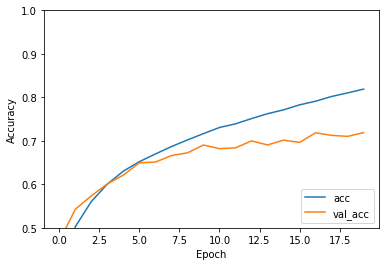

In [55]:
#Der Graph zeigt die Verläufe von Acc und Val_Acc während der verschiedenen Epochendurchläufen
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
